### Mahalavanya Sriram


# Overview
Classification is the process of predicting a new target variable's class on the basis of a training set of data containing observations (or instances) whose category membership is already known.It is considered as a form of supervised learning, i.e., learning where a training set of correctly identified observations is available. This classification in unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance.
classifictaion problems are divided into two main categories:
- Binary Classication Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.
- Multiple classification problems: These problems can have multiple classifiers.

In this work, First I will visualize the data before applying any classification problem and then applying four different classification algorithms andd visualize the results. Following are the four algorithms that I will discuss:

- Pocket Algorithm.
- Quadratic Discriminant Analysis (QDA).
- Linear Discriminant Analysis (LDA).
- Logistic Regression.



# Data
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.hese areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

You must predict the Cover_Type for every row in the test set (565892 observations).

## Data Attributes
The dataset has 54 features and 1 target variable 'Cover_Type'. From 54 features, 10 are numeric and 44 are catrgorical. From 44 categorical, 40 are of Soil_Type and 4 of Wilderness_Area.

1. Elevation - Elevation in meters
2. Aspect - Aspect in degrees azimuth
3. Slope - Slope in degrees
4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

### Data Source

https://www.kaggle.com/c/forest-cover-type-prediction/overview

#### Reading the data

In [1]:
#loading the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score

In [2]:
# Importing all the datasets required
forest_covtype_data = pd.read_csv("data/covtype.csv")

#### Data description

In [3]:
# Checking for the number of rows and columns in a dataset.
forest_covtype_data.shape

(581012, 55)

In [4]:
#Checking the attributes in the dataset
forest_covtype_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
# display all the columns
pd.options.display.max_columns = None
# the top 5 rows of the dataset
forest_covtype_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
# checking the statistical summary of the dataset 
forest_covtype_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Data Cleaning and Pre-processing
##### looking for missing values in the dataset

In [7]:
#Check for nulls in the dataset and count for the number of nulls
forest_covtype_data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


No Missing values are found in the dataset

##### Down Sampling Data

In [8]:
forest_covtype_data = forest_covtype_data.sample(n= 25000)

The above code is just taking random 20000 sample from the dataset because our initial dataset has very large number of samples (more than half a million). So we just sample out the data in order to reduce the computation time.



In [9]:
# Resetting the index for our sampled dataset
forest_covtype_data = forest_covtype_data.reset_index(drop=True)

In [10]:
forest_covtype_data.shape

(25000, 55)

##### Skewness

If the skewness is equal to zero,data is perfectly symmetrical. If skewness is positive, the data are positively skewed or skewed right. If skewness is negative, the data are negatively skewed or skewed left.

In [11]:
# analysing the skewness 
forest_covtype_data.skew()

Elevation                              -0.802353
Aspect                                  0.401583
Slope                                   0.798389
Horizontal_Distance_To_Hydrology        1.164203
Vertical_Distance_To_Hydrology          1.843934
Horizontal_Distance_To_Roadways         0.715943
Hillshade_9am                          -1.178515
Hillshade_Noon                         -1.077920
Hillshade_3pm                          -0.308549
Horizontal_Distance_To_Fire_Points      1.289015
Wilderness_Area1                        0.235224
Wilderness_Area2                        3.945099
Wilderness_Area3                        0.232448
Wilderness_Area4                        3.629878
Soil_Type1                             13.653630
Soil_Type2                              8.768929
Soil_Type3                             12.076166
Soil_Type4                              6.473880
Soil_Type5                             18.819888
Soil_Type6                              8.933267
Soil_Type7          

We can see that many are positively skewed and Soil_Type 8 and Soil_Type 25 are highly positively skewed.
Hillshade data are negatively skewed.

##### Target Data Distribution

In [12]:
print(forest_covtype_data['Cover_Type'].value_counts())

2    12206
1     9006
3     1590
7      841
6      802
5      429
4      126
Name: Cover_Type, dtype: int64


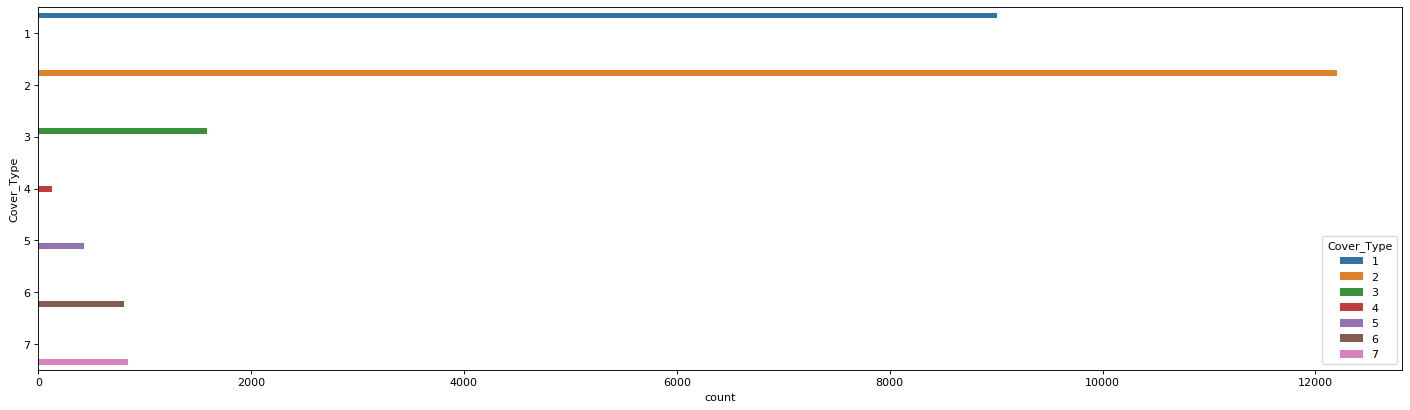

In [13]:
plt.figure(figsize=(22,6), dpi= 80)
ax = sns.countplot(y=forest_covtype_data["Cover_Type"], hue="Cover_Type", data=forest_covtype_data)

The target data is not equally distributed across the cover types

##### Correlation

In [14]:
corr = forest_covtype_data.corr()

In [15]:
corr['Cover_Type'].sort_values(ascending = False)

Cover_Type                            1.000000
Wilderness_Area4                      0.333008
Soil_Type10                           0.251513
Soil_Type39                           0.163215
Slope                                 0.154544
Soil_Type40                           0.140197
Soil_Type38                           0.132549
Soil_Type6                            0.130241
Soil_Type2                            0.124212
Soil_Type4                            0.102326
Soil_Type17                           0.099978
Soil_Type5                            0.083243
Vertical_Distance_To_Hydrology        0.079773
Soil_Type1                            0.077713
Soil_Type37                           0.077522
Wilderness_Area3                      0.069572
Soil_Type3                            0.069098
Soil_Type35                           0.062617
Soil_Type14                           0.056314
Soil_Type11                           0.041476
Soil_Type13                           0.030925
Soil_Type36  

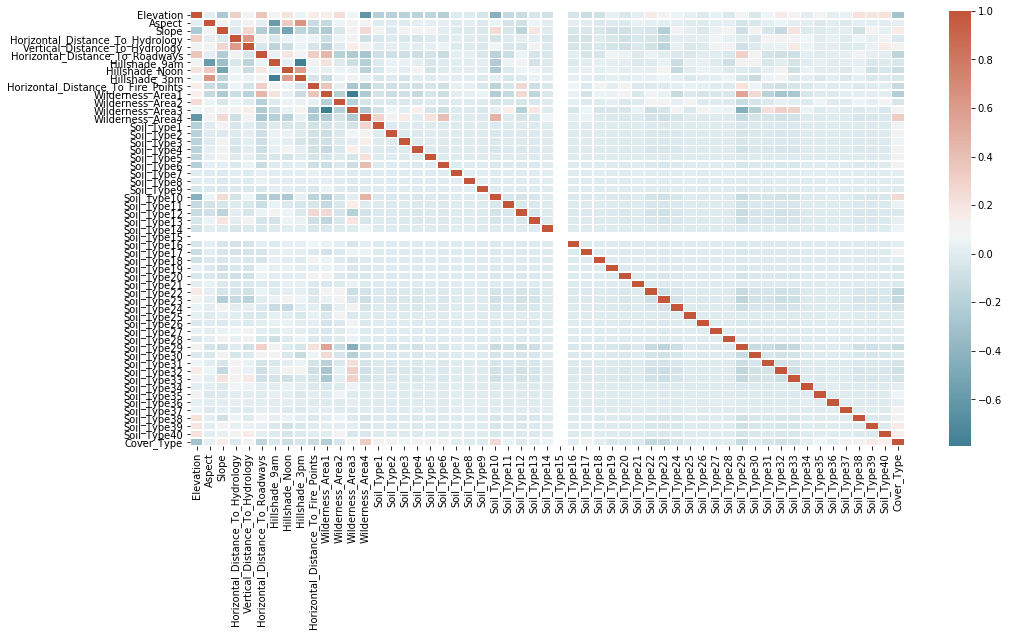

In [16]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

Analysing the above heatmap the following relations were highly corellated
- Elevation and Horizontal Distance to Roadways.
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

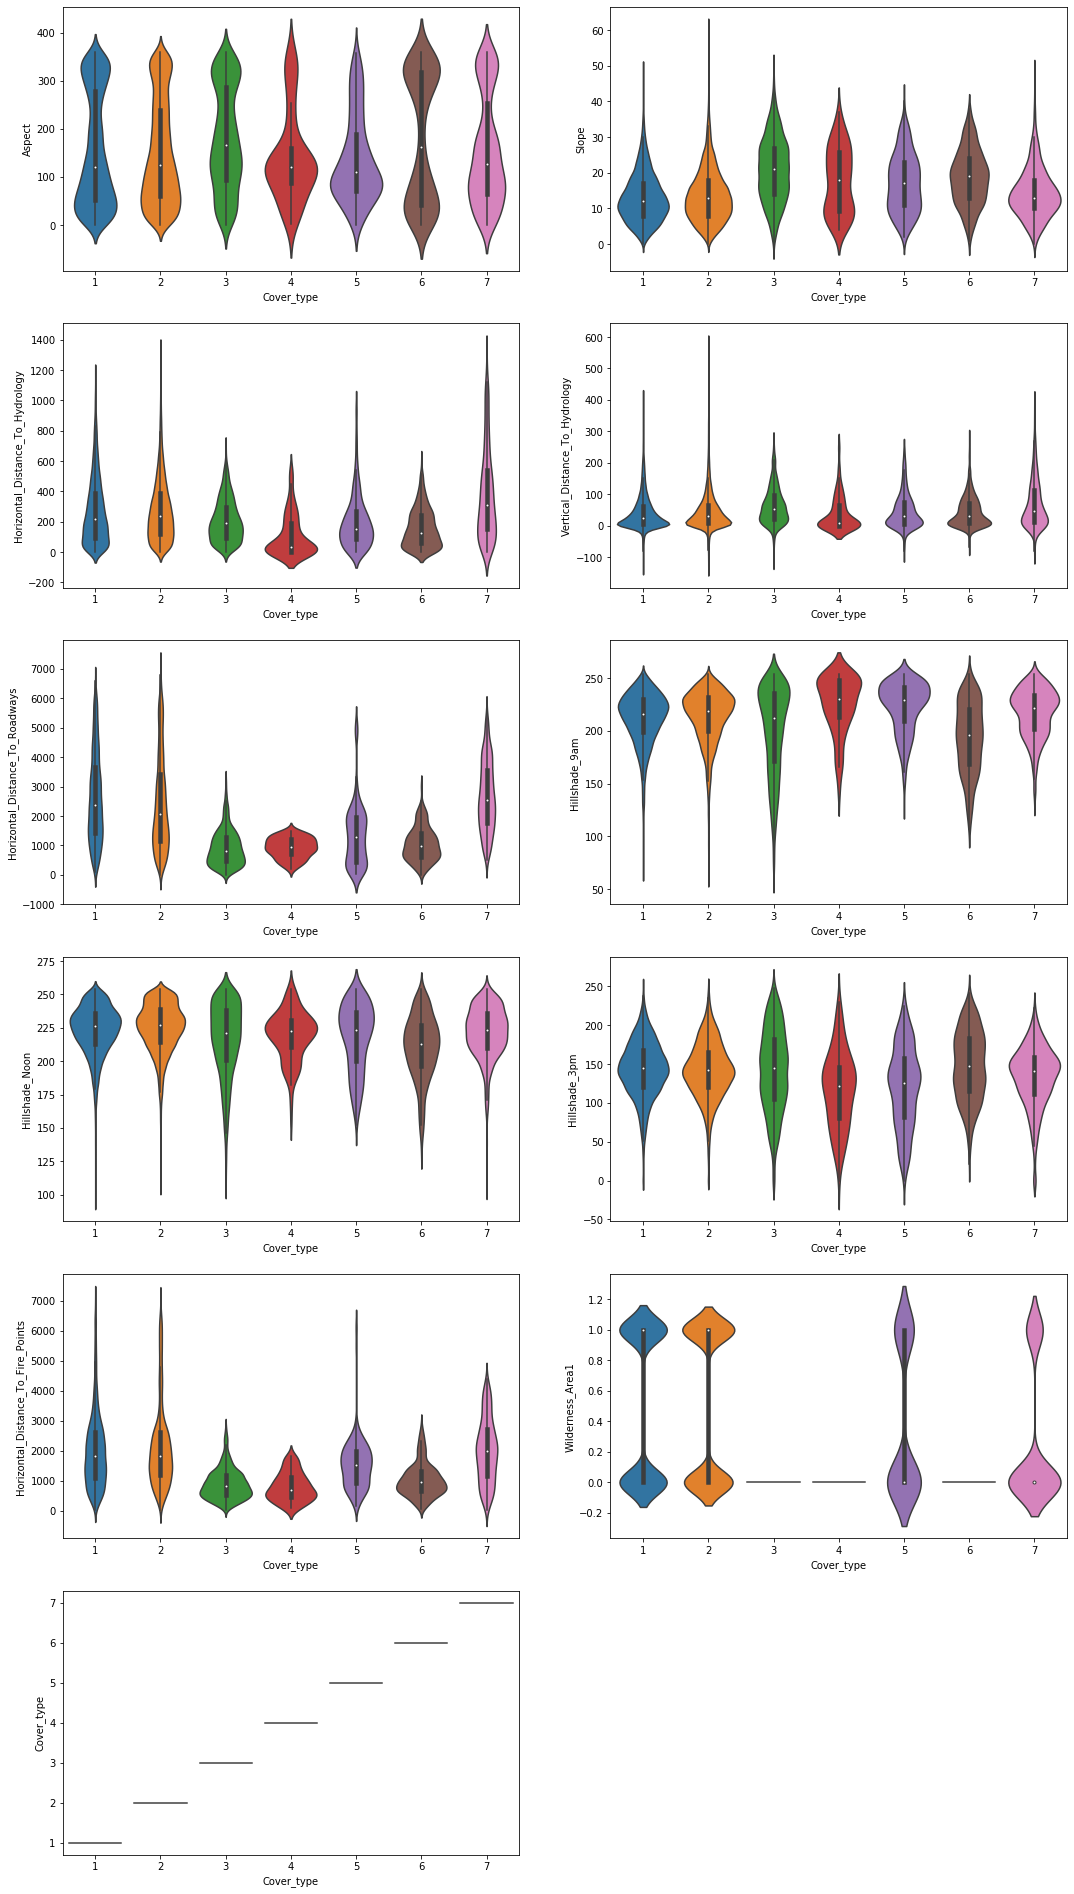

In [17]:
forest_covtype_data_cont = forest_covtype_data.iloc[:,1:11].copy()
 
forest_covtype_data_cont['Cover_type'] = forest_covtype_data.Cover_Type 
fig = plt.figure()
fig.set_figheight(34)
fig.set_figwidth(18)

for i, item in enumerate(forest_covtype_data_cont.columns.to_list()):
    fig.add_subplot(math.ceil(len(forest_covtype_data_cont.columns.to_list())/2), 2, i+1)
    sns.violinplot(y= item, x = 'Cover_type', data = forest_covtype_data_cont)

# plt.savefig('Graph/Bivariate_feat_cover.jpg')
plt.show()

[Text(0, 0, 'Rawah Wilderness Area'),
 Text(0, 0, 'Neota Wilderness Area'),
 Text(0, 0, 'Comanche Peak Wilderness Area'),
 Text(0, 0, 'Cache la Poudre Wilderness Area')]

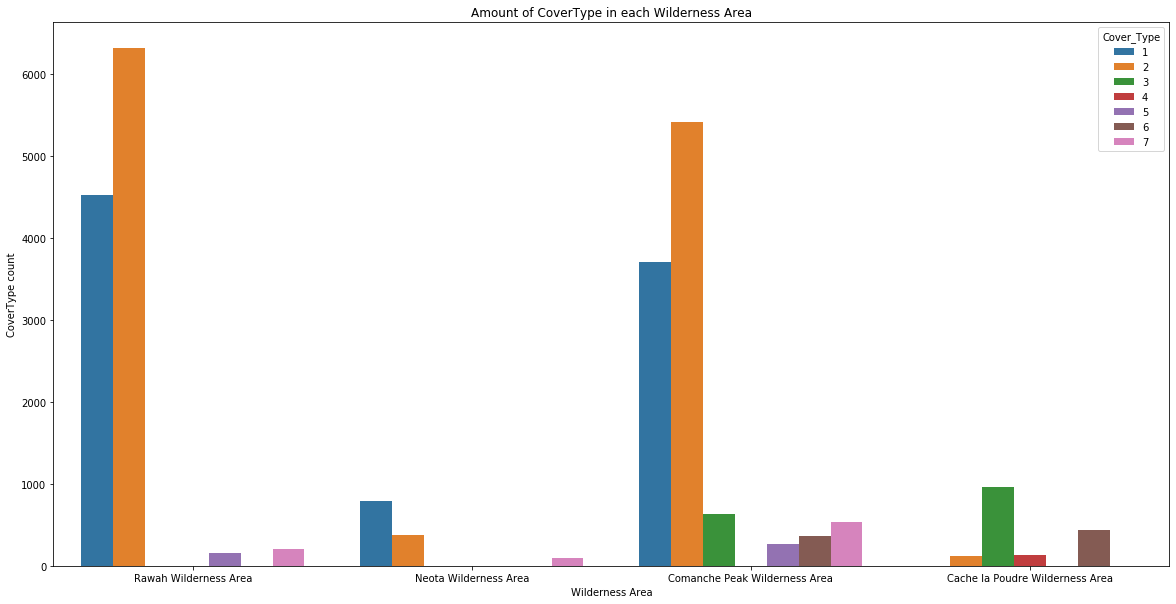

In [18]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
dataTransformed = pd.melt(forest_covtype_data[["Cover_Type",'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']], id_vars=['Cover_Type'], value_vars=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
dataAggregated = pd.DataFrame(dataTransformed.groupby(["Cover_Type","variable"],sort=True)["value"].sum()).reset_index()
sns.barplot(x=dataAggregated["variable"], y=dataAggregated["value"],hue=dataAggregated["Cover_Type"], data = dataAggregated)
ax.set(xlabel='Wilderness Area', ylabel='CoverType count',title = 'Amount of CoverType in each Wilderness Area', label='big')
ax.set_xticklabels(["Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area"])


Wilderness Area Rawah and "Comanche Peak seem to be good discrminators of the cover types (distinct classes).


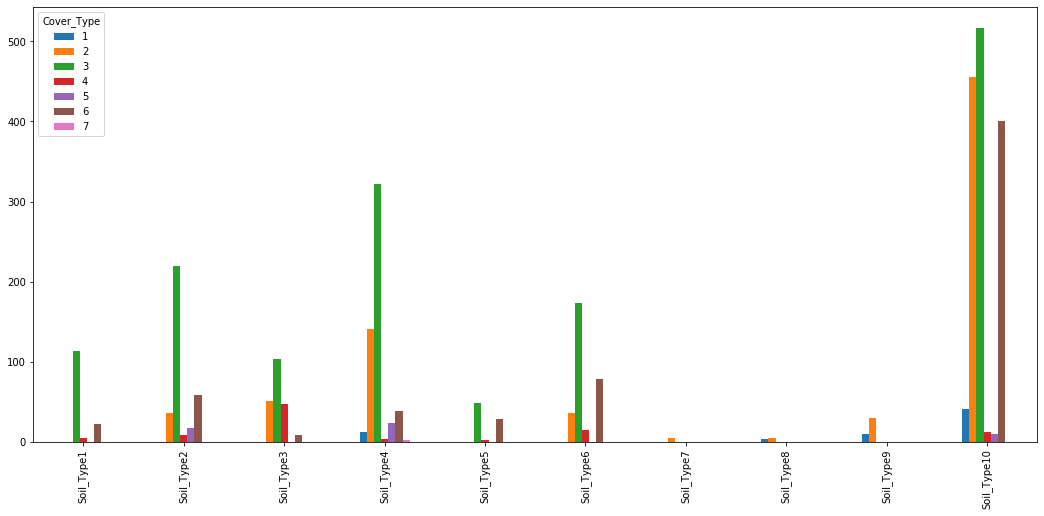

In [19]:
soil_columns = forest_covtype_data.columns[forest_covtype_data.columns.str.contains('Soil')].to_list()
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[:10]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

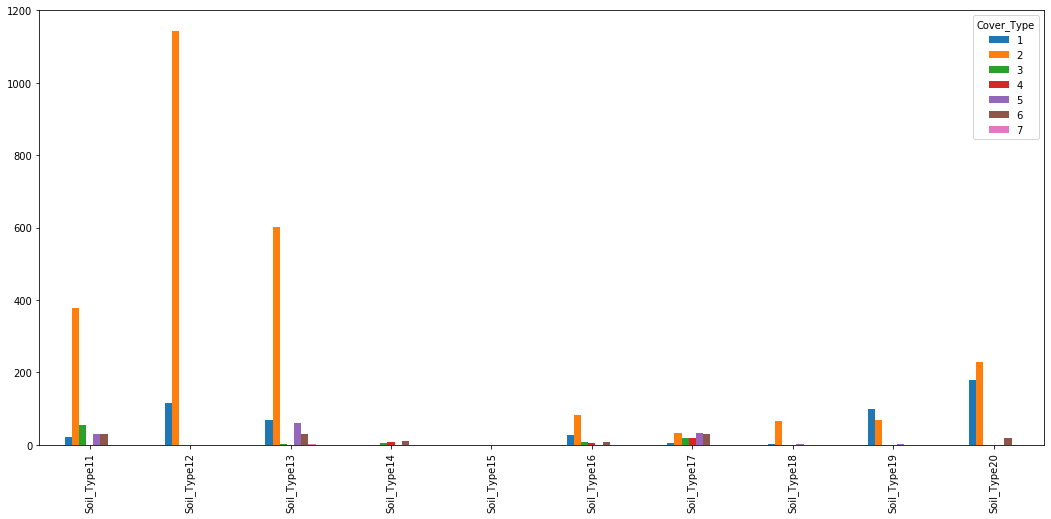

In [20]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[10:20]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

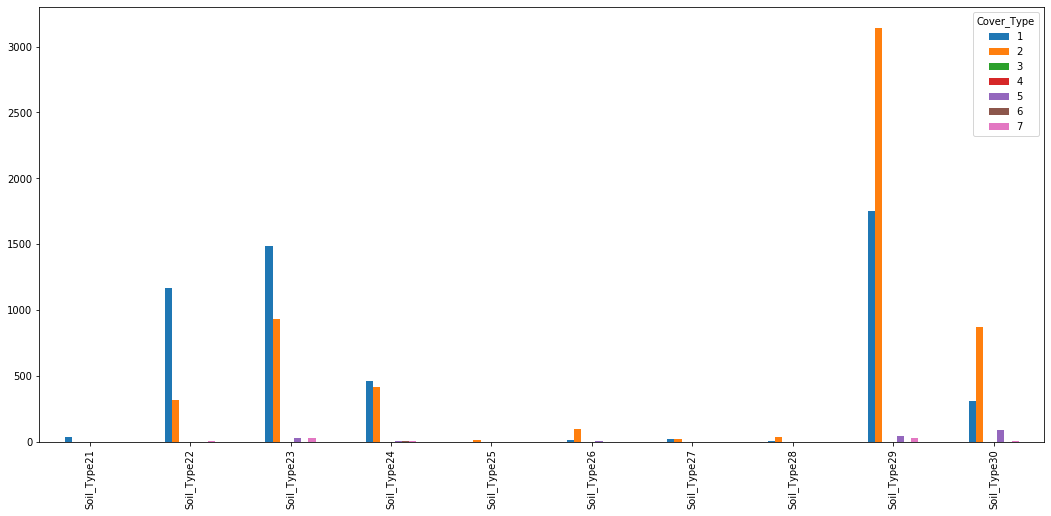

In [21]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[20:30]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

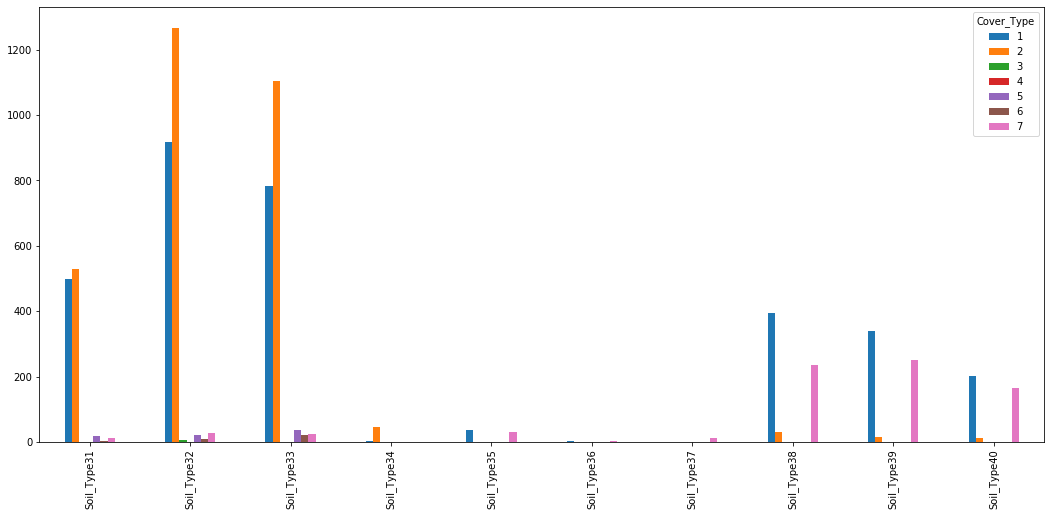

In [22]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[30:]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

### Observation

The Dataset had no missing values. And no issues from the part of categorical attributes because the datatset we got was already Encoded. And Normalization of the data will be handled during the implementation of each algorithm and that can be done in data preprocessing part also, so no difference in that.

From the data visualizations we were able to conclude the following
- The target data is equally distributed across the cover types
- Elevation plays an important role in forest cover type distribution.krummholz,Spruce and Lodgepole trees grow on higher elevation and douglas,Ponderosa and Cottonwood at lower elevation.
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.But Neota Wild Area has least number of forests compared to other wild areas.We can also see that none of the wild areas have all the types of forest covers.
- We have most of the data for soil type 10 and 29. Many soil types are rare in our data
- We can see that Krummholz and Spruce,Fir trees are located at higher elevation in all the four wild areas compared to other trees.
- Many of the Logdepole,Krummholz are located closer to surface waters

### Data Preprocessing

#### Changing the Multi class to Binary class

In [23]:
change = {1:-1, 2:1, 3:-1, 4:-1, 5:-1, 6:-1, 7:-1}
forest_covtype_data_binary = forest_covtype_data.copy()
forest_covtype_data_binary['Cover_Type'] = forest_covtype_data_binary['Cover_Type'].replace(change)

In [24]:
print(forest_covtype_data_binary['Cover_Type'].value_counts())
print(forest_covtype_data_binary.shape)

-1    12794
 1    12206
Name: Cover_Type, dtype: int64
(25000, 55)


We are going to drop the features which have low standard deviation or co-relation.

In [25]:
forest_covtype_data_binary = forest_covtype_data_binary.loc[:,['Horizontal_Distance_To_Roadways', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29','Horizontal_Distance_To_Fire_Points', 'Slope', 'Wilderness_Area4', 'Soil_Type39', 'Soil_Type38', 'Soil_Type2', 'Soil_Type40', 'Soil_Type4', 'Cover_Type']]

# Methods
## Summary of Classification models

We are discussing four classification models:
Pocket Algorithm.
Quadratic Discriminant Analysis (QDA).
Linear Discriminant Analysis (LDA).
Logistic Regression.

#### Pocket Algorithm

Pocket algorithm is based on Perceptron algorithm. It solves the stability problem of perceptron learning by keeping the best solution seen so far "in its pocket". In classification problem, weights are updated over every iteration so it is possible that a good weight was being replaced. When the data is not linearly separable, there is no guarantee on convergence. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. So to overcome this, pocket algorithm is used which keeps the best known weight so far in its pocket.

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$
Here α is learning rate

Considering the above equation, the pocket algorithm stores the best value after iterating through each and evry step and keeping in pocket the best solution.

#### Quadratic Discriminant Analysis (QDA)

We can calculate the posterior and prior probabilities here and define the decision boundry in this case. The data generally follows Gaussian Distribution; for this approach, the means, covariances and prior probabilities. The probability that one instance belongs to a class is calculated by considering the mean, covariance and prior probability for the target.

we can define the discriminant function $\delta_k(xv)$ as

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$
Now, for a new sample $\tilde{xv}$, the label can be predicted with

$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$
The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$.

It is called Quadratic Discriminant Analysis (QDA) as it's decison boundry is quadratic and here we consider two covariance matrix to get our desired value.

#### Linear Discriminant Analysis (LDA)

One of the ways it differs from QDA is that it makes some simplifying assumptions about the data.
In LDA it is assumed that each class has same covariance matrix where as in QDA it was assumed different covariance matrix for all classes. LDA makes some assumptions as follows:

i. It assumes that attributes in the entire data has the same variance.
ii. It assumes the data to be Gaussian so that it can see the graph as a bell shaped curve with normal distribution.


LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class.


$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
 $$


#### Logistic Regression

Logistic Regression is the approach which predicts P(T = k| x) and not the class label k. It is used when the target variable is categorical. Linear regression is unbounded and cannot be used to solve this classification problem and hence we use Logsitic regression. It's value ranges from 0 to 1. The model uses probability to calculate what instance belongs to what class. After calculating probability if its is greater than half (i.e 0.5) then then the instance belongs to that class or else it belongs to the other class.

$$
 wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$

we can get the matrix calculation as,

$$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$


In [26]:
# Splitting the training and test data
from sklearn.model_selection import train_test_split
def split(X, t):
    return train_test_split(X, t, test_size = .2)

## Explanation of Codes

### A. Super Classs Definition

There are two abstract methods in BaseModel class such as train() and use().
Implementation for these classes must be done in the classes which uses them. Classifier class extends the BaseModel class. Classifier class provides three concrete methods :


1. normalize()
2. check_matrix()
3. add_ones().

check_matrix() checks if passed argument is 2D matrix or not and if not then it raises the value error.

add_ones() checks whether the matrix is 2D or not and if it is a matrix then it adds a column of 1s at the beginning of the matrix.
normalize function standardize the input by calculating mean and standard deviation.

In [27]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX) / self.stdX 
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

A class named 'PocketAlgorithm' is created which takes our Classifier as a parameter where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none at the beginning.

In the train function, we have used the parameters of training data and training label for normalizing large amount of data for easy computation. Variables like alpha (learning rate) and the number of iterations are initializes and used. After doing that, the model is trained using the Pocket algorithm derived above, two weights are calculated and considered here and the trained result resturns the best solution from all the solutions. i.e the pocket algorithm keeps track of all the outcomes and at each point considers the best possible solution from all.

In the compare function, we compare 4 parameters like data, weight, best weight and labels to get the best output.

In the use function, we are using the calculated weights and normaliztion of the input X is done with the weights to get the desired output.

In [28]:
from copy import deepcopy as copy

class Perceptron(Classifier):
    
    def __init__(self, alpha):
        self.w = None
        self.w_pocket = None
        self.alpha = alpha
        
    def compare(self, X1, T, w, w_pocket):
        y = np.sign(X1 @ w)
        y_pocket = np.sign(X1 @ w_pocket)
        
        return 1 if(np.sum(y == T) > np.sum(y_pocket == T)) else -1
        
    def train(self, X, T):
        maxiter = 1
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        #print(X1)
        
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = copy(self.w)
        
        for i in range(maxiter):
            converge = True
            for j in range(X.shape[0]):
                y = X1[j] @ self.w
                if(np.sign(y) != np.sign(T[j])):
                    self.w += self.alpha * X1[j] *T[j]
                    converge = False
                    
                    if(self.compare(X1, T, self.w, self.w_pocket) > 0):
                        self.w_pocket[:] = self.w[:]
            
            if converge:
                break
                
    def use(self, X):
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        return X1 @ self.w_pocket

In [29]:
X_pocket = forest_covtype_data_binary.iloc[:,:-1].values
T_pocket = forest_covtype_data_binary.iloc[:,-1].values

In [30]:
#Splitting the datsets onto test and train for Pocket algorithm.
X_train_pocket, X_test_pocket, T_train_pocket, T_test_pocket = split(X_pocket, T_pocket)

print("Shape of X_train_pocket{}, X_test_pocket{}, T_train_pocket{}, T_test_pocket{}"
      .format(X_train_pocket.shape, X_test_pocket.shape, T_train_pocket.shape, T_test_pocket.shape))


Shape of X_train_pocket(20000, 12), X_test_pocket(5000, 12), T_train_pocket(20000,), T_test_pocket(5000,)


In [31]:
perceptron = Perceptron(.000002)
perceptron.train(X_train_pocket, T_train_pocket)
y_pred = perceptron.use(X_test_pocket)

y_pred_pocket = np.where(y_pred < 0, -1, 1)

### C. QDA

A class named 'QDA' is created which takes parameters of our Classifier where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none at the beginning.

In the class of QDA, we take training data, mean, sigma and prior probability and calculates the discriminant values for different classes.

In the train function, we compare 4 parameters and calculate its value to get the best output.

In the use function, we are using the discriminant values and normaliztion of the input X is done with the weights to get the desired output.

In [32]:
class QDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.sigma1 = None
        self.prior1 = None
      
        self.mu2 = None
        self.sigma2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.sigma1 = np.cov(Xs[:N1].T)
        self.prior1 = N1 / N
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.sigma2 = np.cov(Xs[N1:].T)
        self.prior2 = N2 / N
        
    def calculate_QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.pinv(sigma)
        diff = X - mu
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d1 = self.calculate_QDA(Xs, self.mu1, self.sigma1, self.prior1)
        d2 = self.calculate_QDA(Xs, self.mu2, self.sigma2, self.prior2)
        return d1 , d2

In [33]:
X_qda = forest_covtype_data_binary.iloc[:,:-1]
T_qda = forest_covtype_data_binary.iloc[:,-1]

In [34]:
#Splitting the datsets onto test and train for QDA algorithm.
X_train_qda, X_test_qda, T_train_qda, T_test_qda = split(X_qda, T_qda)

print("Shape of X_train_qda{}, X_test_qda{}, T_train_qda{}, T_test_qda{}"
      .format(X_train_qda.shape, X_test_qda.shape, T_train_qda.shape, T_test_qda.shape))

Shape of X_train_qda(20000, 12), X_test_qda(5000, 12), T_train_qda(20000,), T_test_qda(5000,)


Combining the X_train_qda and T_train_qda, so that we can separate the training data according to positive and negatiive classifier.

In [35]:
X_train_qda_combine = pd.concat([X_train_qda, T_train_qda], axis=1)
print("Shape of X_train_qda_combine", X_train_qda_combine.shape)


Shape of X_train_qda_combine (20000, 13)


In [36]:
X_train_qda_combine= X_train_qda_combine.sort_values(by=['Cover_Type'])

Sorting the X_train_qda_combine according to the classifier for training.

In [37]:
X_train_qda_combine.groupby('Cover_Type').size()

Cover_Type
-1    10271
 1     9729
dtype: int64

Calculating the total number of negative classifier(N1) and positive classifier(N2).

In [38]:
N1 = X_train_qda_combine.loc[X_train_qda_combine['Cover_Type'] == -1, 'Cover_Type'].count() 
N2 = X_train_qda_combine.loc[X_train_qda_combine['Cover_Type'] == 1, 'Cover_Type'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))

Values of N1 10271, N2 9729 and N 20000


In [39]:
X_train_qda_combine.shape

(20000, 13)

In [40]:
print(len(T_test_qda[T_test_qda == 1]))

2477


In [41]:
X_train_qda_combine = X_train_qda_combine.values
X_test_qda = X_test_qda.values
T_train_qda = T_train_qda.values
T_test_qda = T_test_qda.values

In [42]:
qda = QDA()
qda.train(X_train_qda_combine[:,:-1], N1, N2)
d1_qda, d2_qda = qda.use(X_test_qda)
d3_qda = np.argmax((d1_qda, d2_qda), axis=0)
y_pred_qda = np.where(d3_qda == 0, -1, 1)

### D. LDA

A class named 'LDA' is created which takes parameters of our Classifier where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none or a value accordingly, at the beginning.

In the class of LDA, we take training data, mean, sigma and prior probability and calculates the discriminant values for different classes. It executes the same way as QDA does, it only differs for the case that in LDA all classes have the same covariance matrix.

In the train function, we compare 4 parameters and calculate its value to get the best output.

In the use function, we are using the discriminant values of two different classes and normaliztion of the input X is done with the weights to get the desired output. It checks instance with the maximum value and returns the predicted output.

In [43]:
class LDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.prior1 = None
        
        self.sigma = None
        
        self.mu2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.prior1 = N1 / N
        
        self.sigma = np.cov(Xs.T)
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.prior2 = N2 / N
        
    def calculate_LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mu
        
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        d1 = self.calculate_LDA(X, self.mu1, self.sigma, self.prior1)
        d2 = self.calculate_LDA(X, self.mu2, self.sigma, self.prior2)
        return d1, d2

In [44]:
X_lda = forest_covtype_data_binary.iloc[:,:-1]
T_lda = forest_covtype_data_binary.iloc[:,-1]

In [45]:
#Splitting the datsets onto test and train for QDA algorithm.
X_train_lda, X_test_lda, T_train_lda, T_test_lda = split(X_lda, T_lda)

print("Shape of X_train_lda{}, X_test_lda{}, T_train_lda{}, T_test_lda{}"
      .format(X_train_lda.shape, X_test_lda.shape, T_train_lda.shape, T_test_lda.shape))

Shape of X_train_lda(20000, 12), X_test_lda(5000, 12), T_train_lda(20000,), T_test_lda(5000,)


In [46]:
X_train_lda_combine = pd.concat([X_train_lda, T_train_lda], axis=1)
print("Shape of X_train_lda_combine", X_train_lda_combine.shape)


Shape of X_train_lda_combine (20000, 13)


In [47]:
X_train_lda_combine= X_train_lda_combine.sort_values(by=['Cover_Type'])

In [48]:
N1 = X_train_lda_combine.loc[X_train_lda_combine['Cover_Type'] == -1, 'Cover_Type'].count() 
N2 = X_train_lda_combine.loc[X_train_lda_combine['Cover_Type'] == 1, 'Cover_Type'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))

Values of N1 10253, N2 9747 and N 20000


In [49]:
X_train_lda_combine.shape

(20000, 13)

In [50]:
X_train_lda_combine = X_train_lda_combine.values
X_test_lda = X_test_lda.values
T_train_lda = T_train_lda.values
T_test_lda = T_test_lda.values

In [51]:
lda = LDA()
lda.train(X_train_lda_combine[:,:-1], N1, N2)
d1, d2 = lda.use(X_test_lda)

d3_lda = np.argmax((d1, d2), axis=0)
y_pred_lda = np.where(d3_lda == 0, -1, 1)

### E. Logistic Regression

A class named 'LogisticRegression' is created which takes parameters of our Classifier where training is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. A softmax function is used here alog with train and use.

In the softmax function, we use the equation$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$his function is called as softmax function. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$
In the train function, we normalize, calculate weight, add the bais term in order to get the best output.

In the use function, we are classifying of the input X with the help of weights and softmax function to get the desired output.

In [52]:
class Logistic(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)
    
    def g(self, X, w):
        return self.softmax( X @ w )
    
    def train(self, X, T):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        
        D = X1.shape[1]
        K = T.shape[1]
        
        max_iter = 100
        self.w = np.zeros((D,K))
        
        for i in range(max_iter):
            y = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T - y)

    def use(self, X):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        y = self.g(X1, self.w)
        y_pred = np.argmax(y, axis = 1)
        return y_pred

In [53]:
X_logistic = forest_covtype_data_binary.iloc[:,:-1]
T_logistic = forest_covtype_data_binary.iloc[:,-1]
print("Shapes of X_logistic{} and T_logistic{}".format(X_logistic.shape, T_logistic.shape))

Shapes of X_logistic(25000, 12) and T_logistic(25000,)


In [54]:
#Splitting the datsets onto test and train for Logistic algorithm.
X_train_logistic, X_test_logistic, T_train_logistic, T_test_logistic = split(X_logistic, T_logistic)

print("Shape of X_train_logistic{}, X_test_logistic{}, T_train_logistic{}, T_test_logistic{}"
      .format(X_train_logistic.shape, X_test_logistic.shape, T_train_logistic.shape, T_test_logistic.shape))


Shape of X_train_logistic(20000, 12), X_test_logistic(5000, 12), T_train_logistic(20000,), T_test_logistic(5000,)


In [55]:
X_train_logistic = X_train_logistic.reset_index(drop=True)
X_test_logistic = X_test_logistic.reset_index(drop=True)
T_train_logistic = T_train_logistic.reset_index(drop=True)
T_test_logistic = T_test_logistic.reset_index(drop=True)

Converting test vector to N*K matrix (K = Number of classifiers).

In [56]:
T_train_logistic_new = pd.get_dummies(T_train_logistic)
print("Shape of T_train_logistic_new",T_train_logistic_new.shape)

Shape of T_train_logistic_new (20000, 2)


In [57]:
X_train_logistic = X_train_logistic.values
X_test_logistic = X_test_logistic.values
T_train_logistic_new = T_train_logistic_new.values
T_test_logistic = T_test_logistic.values

In [58]:
# Converting all -1 values with '0', so that we can easily compare predictions of logistic regressions.
T_test_logistic_new = np.where(T_test_logistic == -1, 0,1)

In [59]:
print(len(T_test_logistic_new[T_test_logistic_new==1]))

2400


In [60]:
logistic = Logistic(.000005)
logistic.train(X_train_logistic, T_train_logistic_new)
y_pred_logistic = logistic.use(X_test_logistic)

print("Accuracy: ", 100 - np.mean(np.abs(T_test_logistic_new - y_pred_logistic)) * 100, "%")

Accuracy:  67.02000000000001 %


# Experiments

## Evaluation Metrics

After all the preprocessing and applying various algorithms on our dataset, ultimately we need to check or visualize its performance. And there different means for performance evaluation in each category of Machine Learrning models. For Classification models are to check for Precision, Recall, Area Under the Curve, Accuracy are various performace metrics.

1. **Confusion Matrix**: This can be used for both binary as well as Multiple classification problems. Four terms are associated with it:

  i) True Positives(TP): This is the case when actual class of data points are True and predicted class is also True.

  ii) True Negatives(TN): This is the case when actual class of data points are False predicted class is also False.

  iii) False Positives(FP): It is the case where the actual class of data points are False and predicted is True.

  iv) False Negatives(FN): It is the case where the actual class of data points are True and predicted is False.


2. **Accuracy**: It is simply number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$
Genearlly, it should not be used when majority of target variable in our dataset are of single class.

1. **Precision**: It just tells us that how accurate our predictions are.$$
Precision = \frac {TP} {TP + FP} 
$$

2. **Recall**: Recall tells us about the actual positives.$$
Recall = \frac {TP} {TP + FN} 
$$

3. **F1 Score**: Each time we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.

$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$

## Train and Test Accuracies:

### Pocket

In [61]:
confusion_matrix(T_test_pocket, y_pred_pocket)

array([[1976,  537],
       [1753,  734]])

In [62]:
precision_pocket = precision_score(T_test_pocket, y_pred_pocket)
recall_pocket = recall_score(T_test_pocket, y_pred_pocket)
f1_pocket = f1_score(T_test_pocket, y_pred_pocket)
accuracy_pocket = accuracy_score(T_test_pocket, y_pred_pocket)
print("Calculated scores for Pocket Algorithm:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_pocket, recall_pocket, f1_pocket, accuracy_pocket))

Calculated scores for Pocket Algorithm:
Precision: 0.5774980330448466, Recall: 0.29513470044229995, F1: 0.3906333155934007, Accuracy: 0.542


### QDA

In [63]:
confusion_matrix(T_test_qda, y_pred_qda)

array([[ 960, 1563],
       [ 115, 2362]])

In [64]:
precision_qda = precision_score(T_test_qda, y_pred_qda)
recall_qda = recall_score(T_test_qda, y_pred_qda)
f1_qda = f1_score(T_test_qda, y_pred_qda)
accuracy_qda = accuracy_score(T_test_qda, y_pred_qda)
print("Calculated scores for QDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_qda, recall_qda, f1_qda, accuracy_qda))

Calculated scores for QDA:
Precision: 0.6017834394904459, Recall: 0.9535728704077513, F1: 0.7378944079975008, Accuracy: 0.6644


### LDA

In [65]:
confusion_matrix(T_test_lda, y_pred_lda)

array([[ 479, 2062],
       [ 366, 2093]])

In [66]:
precision_lda = precision_score(T_test_lda, y_pred_lda)
recall_lda = recall_score(T_test_lda, y_pred_lda)
f1_lda = f1_score(T_test_lda, y_pred_lda)
accuracy_lda = accuracy_score(T_test_lda, y_pred_lda)
print("Calculated scores for LDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_lda, recall_lda, f1_lda, accuracy_lda))

Calculated scores for LDA:
Precision: 0.5037304452466908, Recall: 0.8511590077267182, F1: 0.6328999092833383, Accuracy: 0.5144


### Logistic Regression

In [67]:
confusion_matrix(T_test_logistic_new, y_pred_logistic)

array([[1262, 1338],
       [ 311, 2089]])

In [68]:
precision_logistic = precision_score(T_test_logistic_new, y_pred_logistic)
recall_logistic = recall_score(T_test_logistic_new, y_pred_logistic)
f1_logistic = f1_score(T_test_logistic_new, y_pred_logistic)
accuracy_logistic = accuracy_score(T_test_logistic_new, y_pred_logistic)
print("Calculated scores for Logistic:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

Calculated scores for Logistic:
Precision: 0.6095710533994747, Recall: 0.8704166666666666, F1: 0.717007036210743, Accuracy: 0.6702


## Plots

### Pocket

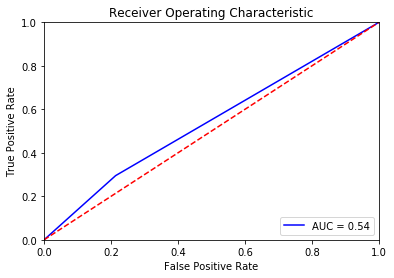

In [69]:
from sklearn.metrics import roc_curve
fpr_pocket, tpr_pocket, threshold_pocket = roc_curve(T_test_pocket, y_pred_pocket)
roc_auc_pocket = auc(fpr_pocket, tpr_pocket)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_pocket, tpr_pocket, 'b', label = 'AUC = %0.2f' % roc_auc_pocket)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

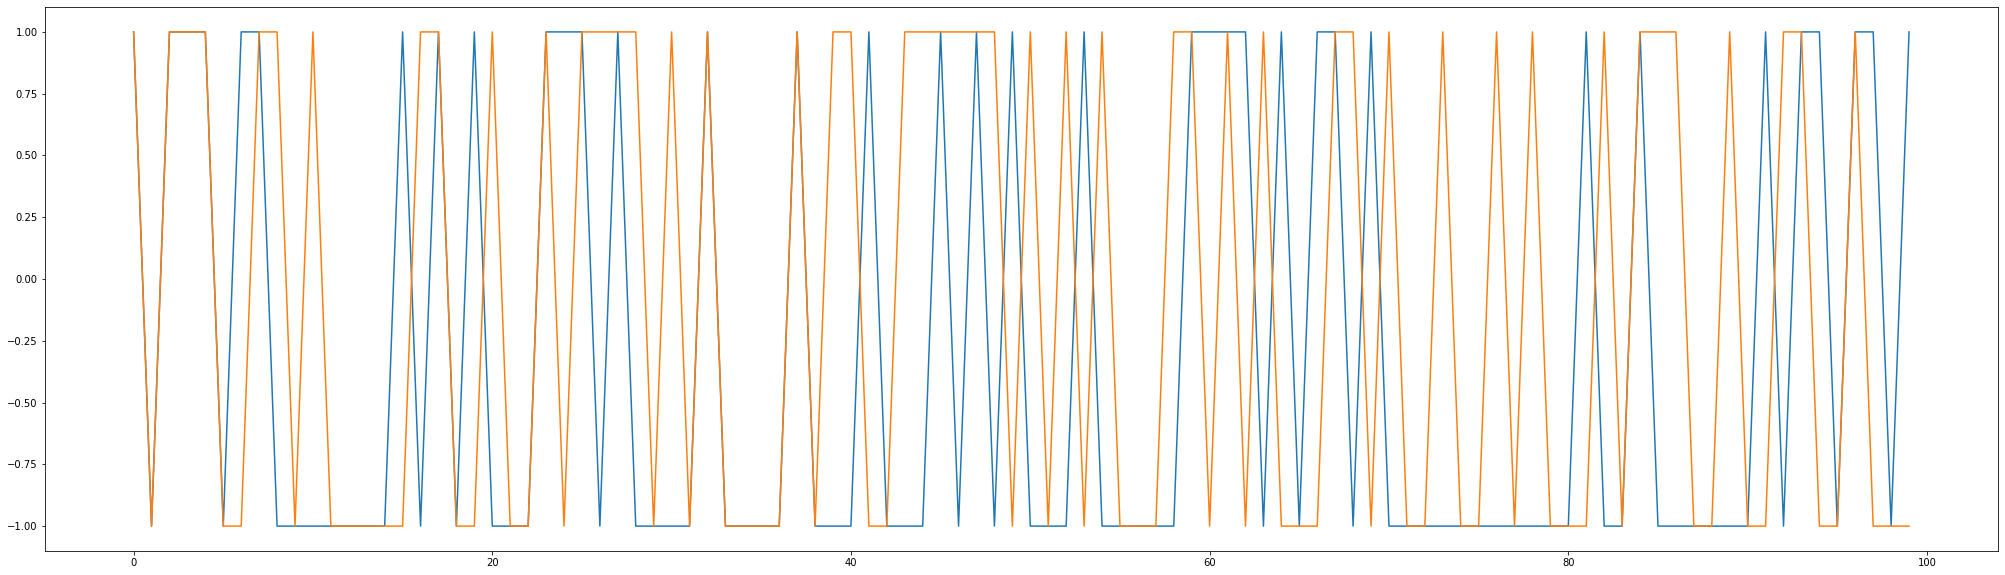

In [70]:
plt.figure(figsize=(35,10))
plt.plot(y_pred_pocket[:100])
plt.plot(T_test_pocket[:100])

### QDA

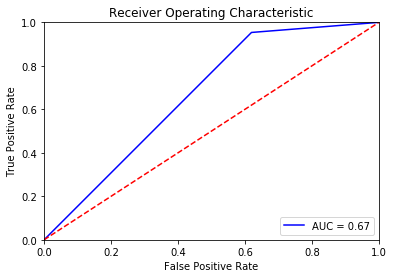

In [71]:
from sklearn.metrics import roc_curve
fpr_qda, tpr_qda, threshold_qda = roc_curve(T_test_qda, y_pred_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

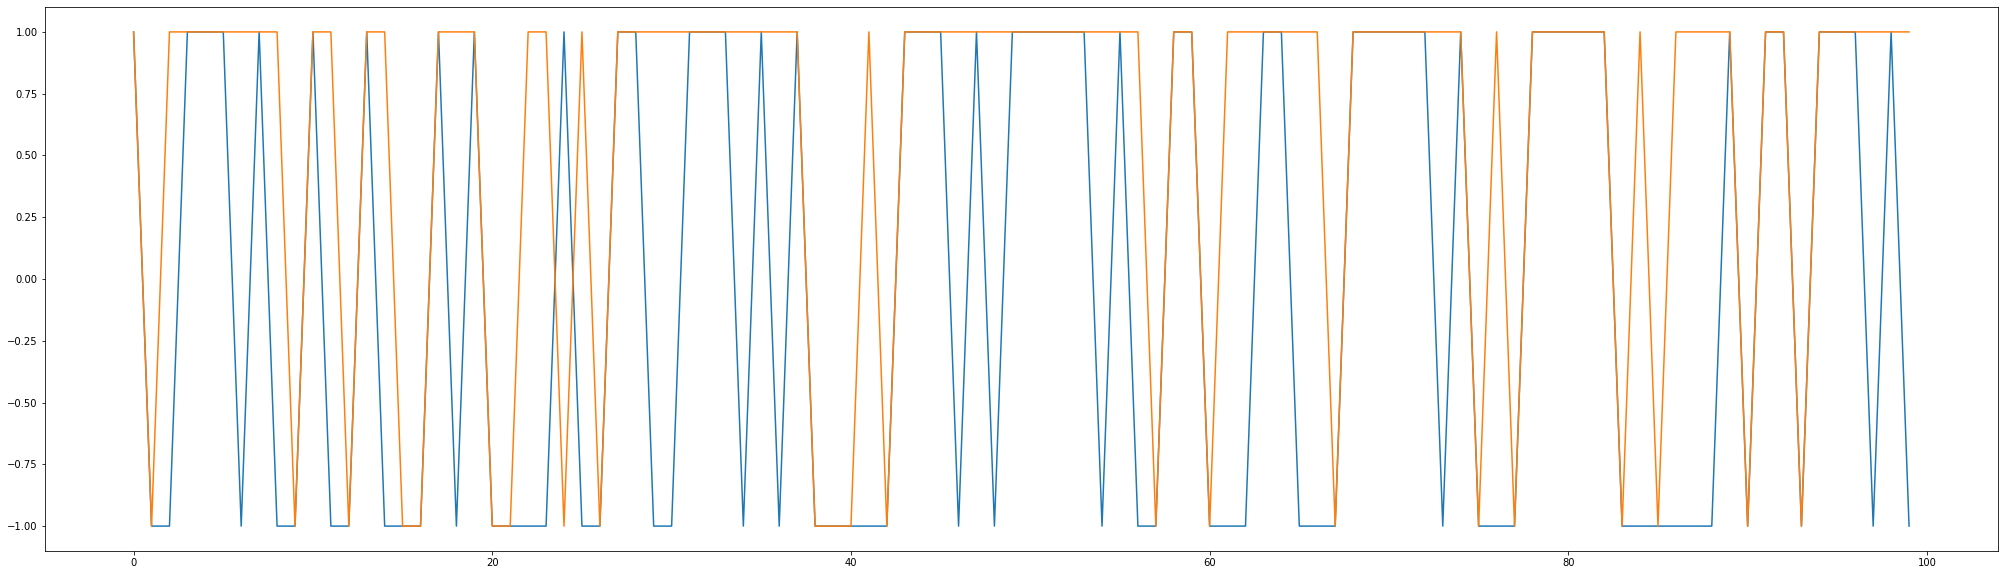

In [72]:
plt.figure(figsize=(35,10))
plt.plot(T_test_qda[:100])
plt.plot(y_pred_qda[:100])

### LDA

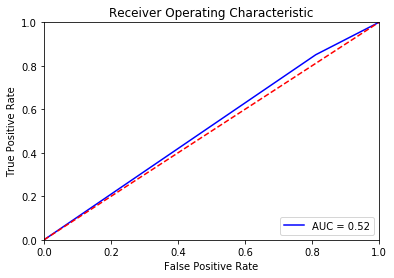

In [73]:
fpr_lda, tpr_lda, threshold_lda = roc_curve(T_test_lda, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

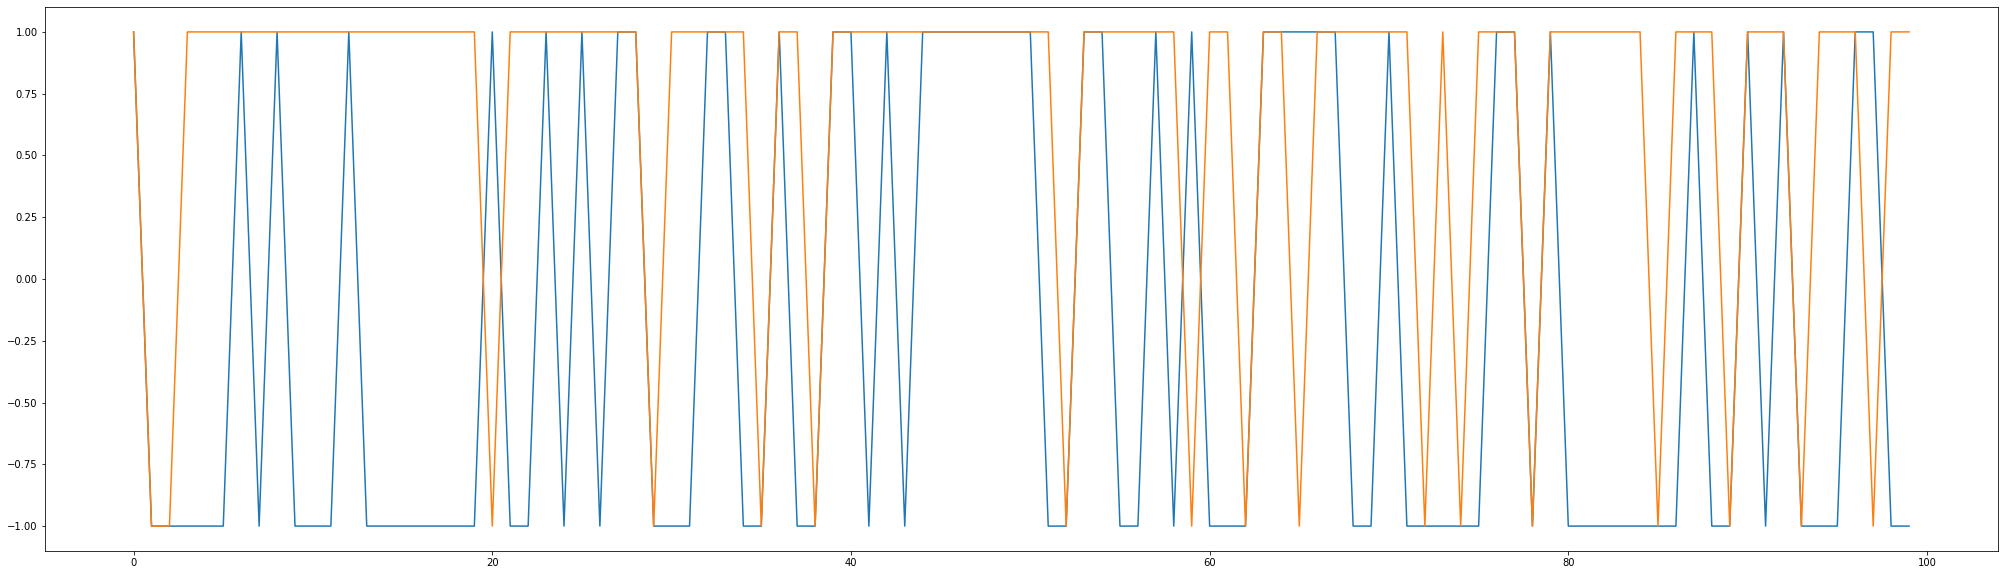

In [74]:
plt.figure(figsize=(35,10))
plt.plot(T_test_lda[:100])
plt.plot(y_pred_lda[:100])

### Logistic Regression

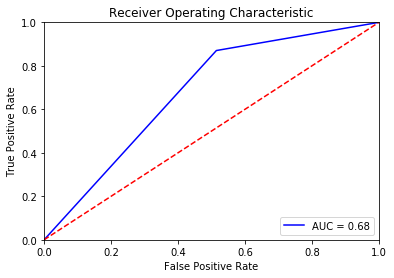

In [75]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(T_test_logistic_new, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logistic, tpr_logistic, 'b', label = 'AUC = %0.2f' % roc_auc_logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

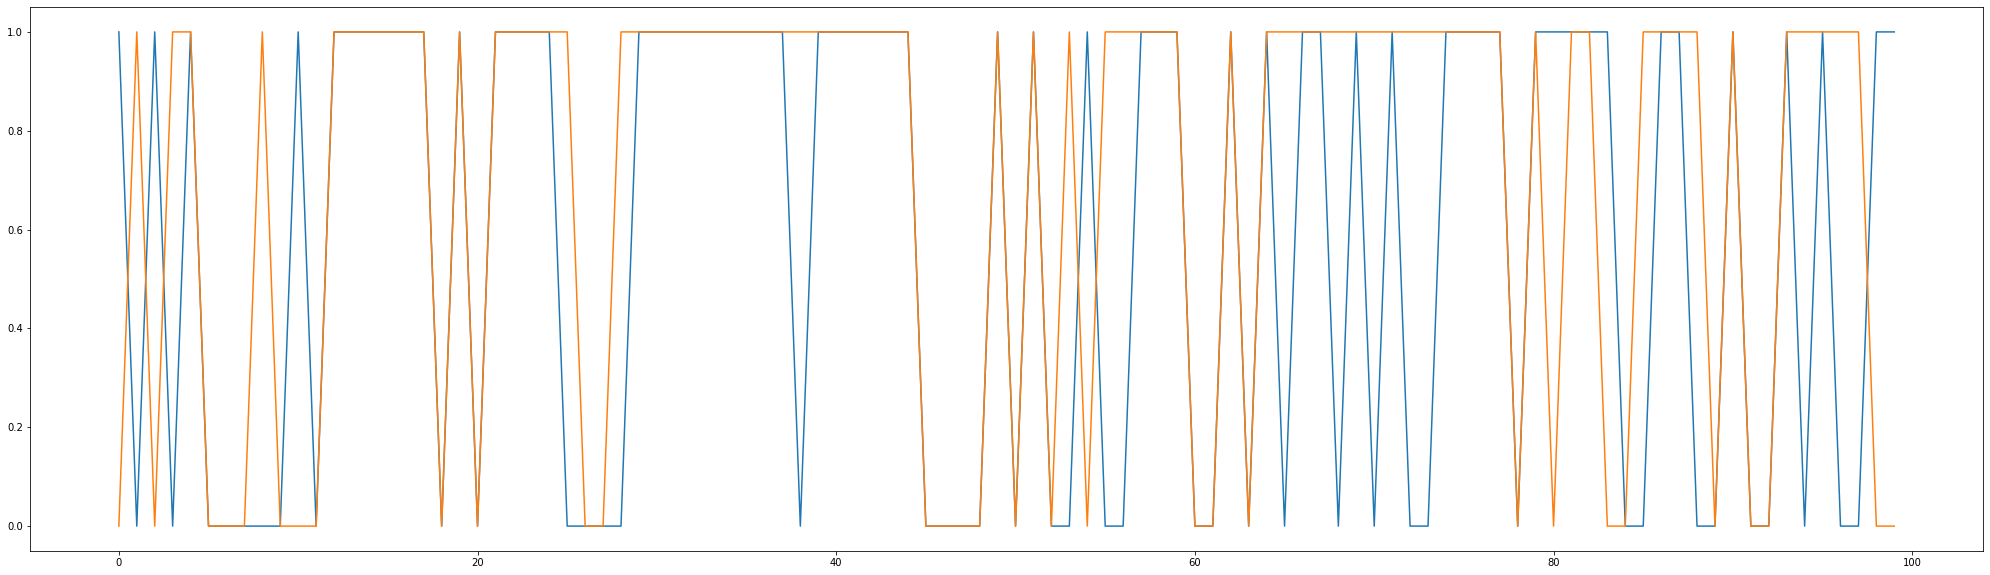

In [76]:
plt.figure(figsize=(35,10))
plt.plot(T_test_logistic_new[:100])
plt.plot(y_pred_logistic[:100])

### Observation

For plotting purpose, We have drwan two types of curve for each algorithm i.e ROC curve and simple plotting of data points between actual test data and predicted values. For latter, I have just used the first 100 datapoints to visualize to have better understanding otherwise for all test data points(5000), we would not be able to understand any thing.

For line plots above for all the algorithms, the orange line are our actual test set while blue line is the predicted ones.

##  Model Comparison

We can differentialte our classification models based of different parameters discussed above and plots drawn above. We have calculated confusion matrix and along with that four different paramerters for evaluation metrics i.e Precision, Recall, F1 score and Accuracy. Below we will briefly summarize performance of each algorithm on all of the calculated performance metrics. Based on these value we can easily infer what we want according to our requirement as we have discussed earlier importance of each performance metric.

**ROC Curve**: This curve is one of performance evaluation metric for the binary classification problems. It is plotted against True Postive Rates(TPR) vs False Positive Rate(FPR). ROC is the proabability curve and AUC represents the are under the curve. More the probability or more our ROC curve towards TPR implies more would be area under the curve and more the is correctly predicting the classes.

So comparing the four algorithms on the basis of ROC curve. Our first algorithm i.e Pocket algorithm is performing quite low as it is having less AUC and probability of 54% predicting the correct result. Almost similar is the case for LDA, which is predicting 52% of the results correct. While other 2 algorithms i.e QDA and Logistic Regression are performing quite better then the earlier ones having the 67% and 68% chance of predicting right result.

**Precision**: Precision also follows similar trends as that of ROC curve. Logistic Regression has the highest precision value among all of them followed by QDA then Pocket and lasty LDA.

**Recall**: In the case of Recall the trend changes slightly from above 2 performance metrics. Recall is highest for QDA(.95) followed by logistic then LDA. But for pocket algorithm Recall is too small(.29) as compared to all other algorithms.

**F1 Score**: This is most important metric for the evaluation of classification model generally. And almost similar in the case of QDA and Logistic Regression (.72 approx) while for other two algorithm this value is quite low.

**Accuracy**: Similar is the case of accuracy, which is higher and almost similar for both QDA and Logistic and for other two its is low and almost similar.

So based on the above information we can clearly interpret that on our dataset Logistic Regression and QDA algorithm is performing well as comapred to other two algorithms. Mainly because of its higher F1 score and great Recall Values.

## Extra Analysis

In [77]:
from sklearn.model_selection import KFold

In [78]:
forest_covtype_data_binary.shape

(25000, 13)

In [79]:
X1 = forest_covtype_data_binary.iloc[:,:-1]
y1 = forest_covtype_data_binary.iloc[:,-1]
print("Shape of X1: {} and y1: {}".format(X1.shape, y1.shape))

Shape of X1: (25000, 12) and y1: (25000,)


In [80]:
def calcuate_performance(y_test, y_pred):
    precision_logistic = precision_score(y_test, y_pred)
    recall_logistic = recall_score(y_test, y_pred)
    f1_logistic = f1_score(y_test, y_pred)
    accuracy_logistic = accuracy_score(y_test, y_pred)
    print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

### Pocket

In [81]:
pocket = Perceptron(.00002)

In [82]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index].values, X1.iloc[test_index].values
    y_train, y_test = y1.iloc[train_index].values, y1.iloc[test_index].values

    perceptron.train(X_train, y_train)
    y_pred = perceptron.use(X_test)

    y_pred_pocket = np.where(y_pred < 0, -1, 1)
        
    calcuate_performance(y_test, y_pred_pocket)

Precision: 0.5644208037825059, Recall: 0.39332784184514, F1: 0.46359223300970875, Accuracy: 0.558
Precision: 0.554726368159204, Recall: 0.27678940835746796, F1: 0.3693072039746067, Accuracy: 0.543
Precision: 0.5307773478719663, Recall: 0.6136640910939406, F1: 0.5692191625801585, Accuracy: 0.5432
Precision: 0.5605806811836963, Recall: 0.4073022312373225, F1: 0.4718045112781955, Accuracy: 0.5504
Precision: 0.5501583949313622, Recall: 0.4275748871563398, F1: 0.481182175017317, Accuracy: 0.5506


For the pocket algorithm there exists good improvement after all the iterations. Recall values are improved significantly.

### QDA

In [83]:
qda_cross = QDA()

In [84]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train_new = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    qda_cross.train(X_train_new, N1, N2)
    d1, d2 = qda_cross.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calcuate_performance(y_test, y_pred_qda)

Precision: 0.4856, Recall: 1.0, F1: 0.6537425955842757, Accuracy: 0.4856
Precision: 0.4834, Recall: 1.0, F1: 0.6517459889443171, Accuracy: 0.4834
Precision: 0.4918, Recall: 1.0, F1: 0.6593377128301381, Accuracy: 0.4918
Precision: 0.493, Recall: 1.0, F1: 0.6604152712659076, Accuracy: 0.493
Precision: 0.4874, Recall: 1.0, F1: 0.6553717897001479, Accuracy: 0.4874


Similar steps I performed for the QDA algorithm and found that it is aslo showing similar behaviour as that of Pocket algorithm. There is slight improvement in the evaluation metrics parameters in the 4 step.


### LDA

In [85]:
X2 = forest_covtype_data_binary.iloc[:,:-1]
y2 = forest_covtype_data_binary.iloc[:,-1]
print("Shape of X2: {} and y2: {}".format(X2.shape, y2.shape))

Shape of X2: (25000, 12) and y2: (25000,)


In [86]:
lda_cross = LDA()

In [87]:
kf_lda = KFold(n_splits=5)
scores = []
for train_index, test_index in kf_lda.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train_new = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    X_train_new = X_train_new.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    lda_cross.train(X_train_new, N1, N2)
    d1, d2 = lda_cross.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calcuate_performance(y_test, y_pred_qda)

Precision: 0.4962928637627433, Recall: 0.8822075782537068, F1: 0.6352313167259788, Accuracy: 0.508
Precision: 0.49385863267670915, Recall: 0.8816714935870914, F1: 0.6330956625074271, Accuracy: 0.506
Precision: 0.4991903770529725, Recall: 0.8775925172834486, F1: 0.6363904452963728, Accuracy: 0.5068
Precision: 0.49952335557673977, Recall: 0.8503042596348884, F1: 0.6293349346944903, Accuracy: 0.5062
Precision: 0.4962192816635161, Recall: 0.8617152236356176, F1: 0.6297795771479983, Accuracy: 0.5062


For the case of LDA there are slight changes in performance metrics parameters. But it almost remain on the same range.

### Logistic Regression

In [88]:
logistic_cross = Logistic(.00003)

In [89]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    y_train_new = pd.get_dummies(y_train)
    y_test_new = np.where(y_test == -1, 0,1)
    
    logistic_cross.train(X_train, y_train_new.values)
    y_pred_logistic = logistic_cross.use(X_test)
    
    calcuate_performance(y_test_new, y_pred_logistic)

Precision: 0.6146496815286624, Recall: 0.8743822075782537, F1: 0.7218633117987079, Accuracy: 0.6728
Precision: 0.6246680436706993, Recall: 0.8758791890773686, F1: 0.7292456079917327, Accuracy: 0.6856
Precision: 0.621150493898896, Recall: 0.8694591297275315, F1: 0.7246229452635147, Accuracy: 0.675
Precision: 0.6296406296406296, Recall: 0.8600405679513184, F1: 0.7270233196159122, Accuracy: 0.6816
Precision: 0.6287496287496287, Recall: 0.8686910135412392, F1: 0.7294968986905582, Accuracy: 0.686


Logistic regression has shown a good improvement in the values. The accuracy in the last iteration is increased significantly from 0.672 to 0.686

# Conclusion


In this workbook we have learned and implemented four different classification algorithms Pocket algorith, QDA, LDA, Logistic Regression on 'Forest Cover Type' dataset. This was multi-class dataset having the classes from 1-7 representing the different types forest type. We did some alterations in our dataset that we have converted this multi-class problem to binary for better understanding and another reason is that the Pocket algorithm is binary classification algorithm but all other can work with muti-class problems. Another alteration was that we have sampled out random 25000 rows from the dataset because original datatset was huge and we would face computation problems.

For data preprocessing part, our data was already encoded and have no null values. We just analyze the data through correlation matrix and some pre visualiztion plots. to understand the attributes. We filter out attributes on the basis of correlation matrix otherwise our mmodels will not predict anything. One of most important plot we havve seen in this case was distplot which infers about how our data for that attribute is distributed. We chacked that for 3 columns and found that our data is not well normally distributed and it is skewed. Our two models QDA and LDA have the basic assumption that our data should in Gaussian Distribution. This is one reason that our these two models did not perform so well on this dataset. But still QDA performs relatively better as comapred to other models except Logistic Regressiion model.

Based on our evaluation metrics and plots especially ROC-AUC curve discussed above clearly depicts that Pocket algorithm and LDA did not perform well on our dataset as they have very low accuracy (50% approx). On the other hand, other 2 algorithms i.e QDA and Logistic algorithms perform quite well on our data. As they were having very high Recall value and F1 score along with approx 68% accuracy.


# References

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. https://seaborn.pydata.org/tutorial.html

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. https://www.kaggle.com/c/forest-cover-type-prediction